# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from Kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications, we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

- Understand what factors make a used car more or less expensive. 
- Provide a recommendation to the used car dealoers on what factors in a used car are valued by customers

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

df = pd.read_csv('data/vehicles.csv')
df.head()
df
# df.describe()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,7301591192,wyoming,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226.0,clean,other,1N4AA6AV6KC367801,fwd,NaN,sedan,NaN,wy
426876,7301591187,wyoming,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,gas,12029.0,clean,other,7JR102FKXLG042696,fwd,NaN,sedan,red,wy
426877,7301591147,wyoming,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,diesel,4174.0,clean,other,1GYFZFR46LF088296,NaN,NaN,hatchback,white,wy
426878,7301591140,wyoming,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112.0,clean,other,58ABK1GG4JU103853,fwd,NaN,sedan,silver,wy


- The data contains 426880 rows of car data with 19 columns 
- There are a lot of NaN values.

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [66]:
df.dropna(inplace=True)
df.info()
df.value_counts()

for col in df.columns:
    print(col)
    print(df[col].unique())
    print(df[col].nunique())
    print('\n')

df.head()


<class 'pandas.core.frame.DataFrame'>
Index: 34868 entries, 126 to 426836
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            34868 non-null  int64  
 1   region        34868 non-null  object 
 2   price         34868 non-null  int64  
 3   year          34868 non-null  float64
 4   manufacturer  34868 non-null  object 
 5   model         34868 non-null  object 
 6   condition     34868 non-null  object 
 7   cylinders     34868 non-null  object 
 8   fuel          34868 non-null  object 
 9   odometer      34868 non-null  float64
 10  title_status  34868 non-null  object 
 11  transmission  34868 non-null  object 
 12  VIN           34868 non-null  object 
 13  drive         34868 non-null  object 
 14  size          34868 non-null  object 
 15  type          34868 non-null  object 
 16  paint_color   34868 non-null  object 
 17  state         34868 non-null  object 
dtypes: float64(2), int64(2), obj

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
126,7305672709,auburn,0,2018.0,chevrolet,express cargo van,like new,6 cylinders,gas,68472.0,clean,automatic,1GCWGAFP8J1309579,rwd,full-size,van,white,al
127,7305672266,auburn,0,2019.0,chevrolet,express cargo van,like new,6 cylinders,gas,69125.0,clean,automatic,1GCWGAFP4K1214373,rwd,full-size,van,white,al
128,7305672252,auburn,0,2018.0,chevrolet,express cargo van,like new,6 cylinders,gas,66555.0,clean,automatic,1GCWGAFPXJ1337903,rwd,full-size,van,white,al
215,7316482063,birmingham,4000,2002.0,toyota,echo,excellent,4 cylinders,gas,155000.0,clean,automatic,JTDBT123520243495,fwd,compact,sedan,blue,al
219,7316429417,birmingham,2500,1995.0,bmw,525i,fair,6 cylinders,gas,110661.0,clean,automatic,WBAHD6322SGK86772,rwd,mid-size,sedan,white,al


- Out of 18 columns there are 4 numerical columns and 14 categorical columns. 
- There are total 12 different paint colors 
- There is data from all the states of USA 
- After dropping non-null values there were 34868 entries. 

### Data Preparation

After our initial exploration and fine-tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

Preparation Steps 
- Drop Null Values
- Remove rows that have price values set to 0.
- Drop the columns that have no impact on price of the car(like IDs, VIN numbers etc.,). Draw the price to column value relationship plots. 
- Transform Non-Numerical columns into Numberical Columns or Use Encodings 
- Determine the most useful columns via the Correlation Plots.



In [67]:
df = pd.read_csv('data/vehicles.csv')
df_prepared = df.dropna()
df_prepared = df_prepared.drop(columns=['id', 'VIN', 'state', 'region'])
df_prepared = df_prepared[df_prepared['price'] != 0].reset_index(drop=True) # Drop rows with price 0
# Create df_expensive BEFORE percentile filtering (which removes prices > 44500)
df_expensive = df_prepared[df_prepared['price'] >= 50000].copy()
df_prepared.head()
df_prepared.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32496 entries, 0 to 32495
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         32496 non-null  int64  
 1   year          32496 non-null  float64
 2   manufacturer  32496 non-null  object 
 3   model         32496 non-null  object 
 4   condition     32496 non-null  object 
 5   cylinders     32496 non-null  object 
 6   fuel          32496 non-null  object 
 7   odometer      32496 non-null  float64
 8   title_status  32496 non-null  object 
 9   transmission  32496 non-null  object 
 10  drive         32496 non-null  object 
 11  size          32496 non-null  object 
 12  type          32496 non-null  object 
 13  paint_color   32496 non-null  object 
dtypes: float64(2), int64(1), object(11)
memory usage: 3.5+ MB


In [68]:
df_prepared['price'].sort_values(ascending=False)

24882    155000
6199     150000
28104    144832
8724     135000
18472    129928
          ...  
6968          1
6969          1
6970          1
6971          1
7745          1
Name: price, Length: 32496, dtype: int64

In [ ]:
df_prepared['price'].plot(kind='bar', title='Price Values Visualization')
plt.ylabel('Price')
plt.show()

Used Vehicles with price grater than 50000

In [ ]:
# df_expensive created in data loading cell (before percentile filtering)
df_expensive.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         0 non-null      int64  
 1   year          0 non-null      float64
 2   manufacturer  0 non-null      object 
 3   model         0 non-null      object 
 4   condition     0 non-null      object 
 5   cylinders     0 non-null      int64  
 6   fuel          0 non-null      object 
 7   odometer      0 non-null      float64
 8   title_status  0 non-null      object 
 9   transmission  0 non-null      object 
 10  drive         0 non-null      object 
 11  size          0 non-null      object 
 12  type          0 non-null      object 
 13  paint_color   0 non-null      object 
dtypes: float64(2), int64(2), object(10)
memory usage: 0.0+ bytes


In [126]:
df_prepared['price']

0         4000
1         2500
2         9000
3         8950
4         4000
         ...  
32491    23495
32492    12995
32493    32999
32494    15999
32495     6800
Name: price, Length: 32496, dtype: int64

In [127]:
percentile_95_value = df['price'].quantile(0.95)
print(percentile_95_value)
percentile_10_value = df['price'].quantile(0.10)
print(percentile_10_value)

44500.0
500.0


In Order to avoid outliers I will drop the rows with prices that fall in lower 10% quartile and the higher 5% quartile. 

In [128]:
df_prepared = df_prepared[df_prepared['price'] >= percentile_10_value].reset_index(drop=True) # Drop rows with price less than percentile_10_value

In [129]:
df_prepared['price'].describe()

count     31701.000000
mean      17418.774171
std       13105.003318
min         500.000000
25%        7990.000000
50%       13900.000000
75%       23900.000000
max      155000.000000
Name: price, dtype: float64

In [130]:
df_prepared = df_prepared[df_prepared['price'] <= percentile_95_value].reset_index(drop=True) # Drop rows with price greater than percentile_95_value
df_prepared['price'].describe()

count    30291.000000
mean     15651.811297
std      10062.996439
min        500.000000
25%       7800.000000
50%      12995.000000
75%      21950.000000
max      44500.000000
Name: price, dtype: float64

In [131]:
df_prepared['cylinders'].value_counts()

cylinders
4 cylinders     10520
6 cylinders     10145
8 cylinders      8894
10 cylinders      309
5 cylinders       268
other              85
3 cylinders        60
12 cylinders       10
Name: count, dtype: int64

In [132]:
# Convert cylinders to numeric
df_prepared['cylinders'] = df_prepared['cylinders'].str.replace('cylinders', '')
df_prepared = df_prepared[df_prepared['cylinders'] != 'other'].reset_index(drop=True)
df_prepared['cylinders'] = df_prepared['cylinders'].astype(int)
df_prepared['cylinders'].value_counts()

cylinders
4     10520
6     10145
8      8894
10      309
5       268
3        60
12       10
Name: count, dtype: int64

In [133]:
df_prepared['size'].value_counts()

size
full-size      17651
mid-size        8660
compact         3323
sub-compact      572
Name: count, dtype: int64

In [134]:
df_prepared['paint_color'].value_counts()

paint_color
white     8235
black     5477
silver    4248
grey      3755
blue      3005
red       2695
custom     839
green      807
brown      726
yellow     208
orange     139
purple      72
Name: count, dtype: int64

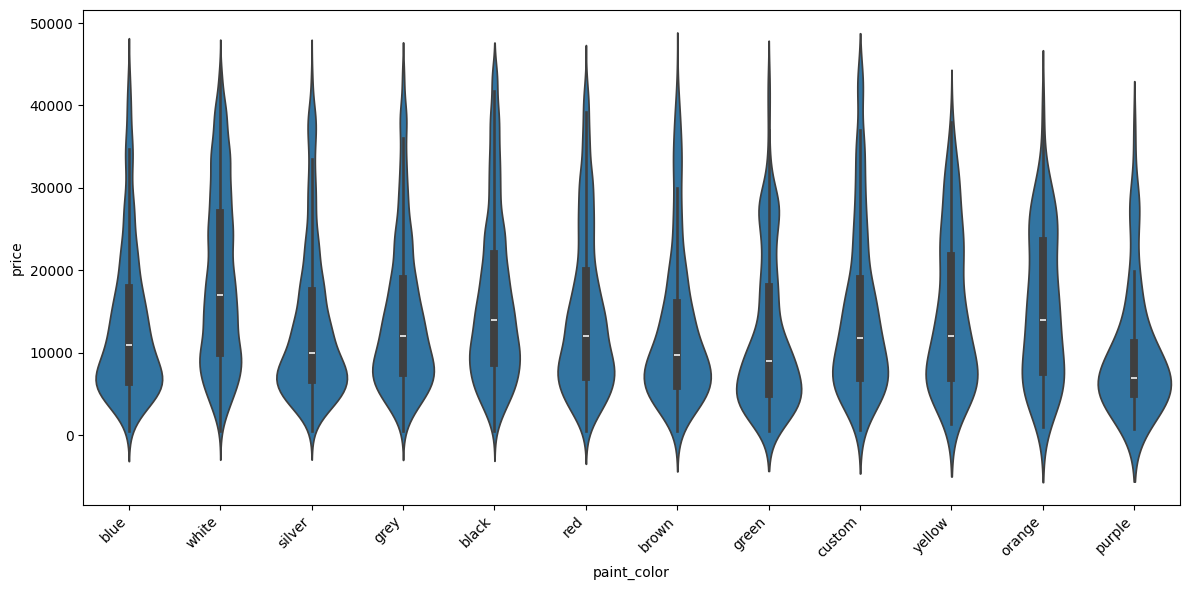

In [135]:
import matplotlib.pyplot as plt
import seaborn as sns

# Violin plot
plt.figure(figsize=(12, 6))
sns.violinplot(data=df_prepared, x='paint_color', y='price')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

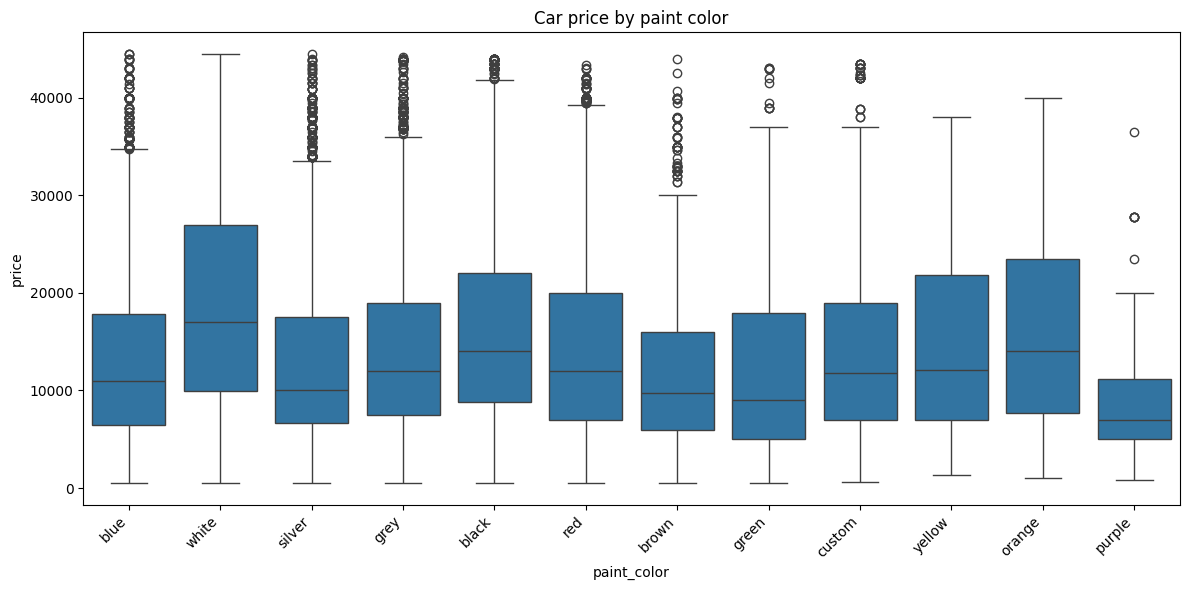

In [136]:
# Box plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_prepared, x='paint_color', y='price')
plt.xticks(rotation=45, ha='right')
plt.title('Car price by paint color')
plt.tight_layout()
plt.show()

In [137]:
df_prepared.groupby('paint_color')['price'].agg(['count', 'mean', 'median', 'std'])

,count,mean,median,std
paint_color,,,,
black,5477,16449.895381,13995.0,10119.308376
blue,3005,13424.586356,10980.0,9064.442961
brown,726,12806.823691,9725.0,9148.034419
custom,839,14630.067938,11795.0,10095.853968
green,807,12083.433705,8995.0,9249.292647
grey,3755,14291.229028,11995.0,9101.507665
orange,139,15479.712230,13995.0,8991.946518
purple,72,9844.222222,6990.0,7574.386548
red,2695,14646.405937,11999.0,9652.613670


In [138]:
df_prepared['fuel'].value_counts()

fuel
gas         27795
diesel       1988
hybrid        378
other          30
electric       15
Name: count, dtype: int64

In [139]:
df_prepared['size'].value_counts()

size
full-size      17651
mid-size        8660
compact         3323
sub-compact      572
Name: count, dtype: int64

In [140]:
df_prepared['model'].value_counts()

model
f-150                    772
silverado 1500           747
1500                     391
escape                   241
silverado 2500hd         240
                        ... 
benz c230 kompressor       1
yaris coupe hatchback      1
galant es                  1
silverado 1500 cc 4x4      1
cruze, 2lt                 1
Name: count, Length: 4717, dtype: int64

In [141]:
df_prepared['condition'].value_counts()

condition
excellent    16783
good          9364
like new      3428
fair           478
new            117
salvage         36
Name: count, dtype: int64

In [142]:
df_prepared['title_status'].value_counts()

title_status
clean         29140
rebuilt         699
salvage         236
lien            117
missing          12
parts only        2
Name: count, dtype: int64

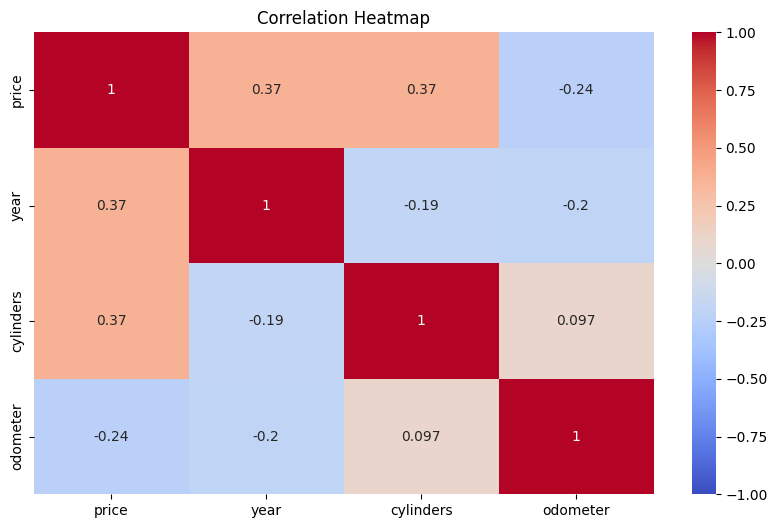

In [143]:
# Selecting numerical features only
data_numeric = df_prepared.select_dtypes(include=['float64', 'int64'])

# Heatmap on numerical features
plt.figure(figsize=(10, 6))
sns.heatmap(data_numeric.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

Observations from Correlation Map 
- There is a high correlation between year, number of cylinders and price. 
- There is an inverse correlation between odometer and price. The more the odometer the less the price. 

Relationship to Price for other categorical variables like condition, model, year, fuel, condition, trnsmission, title_status etc., 

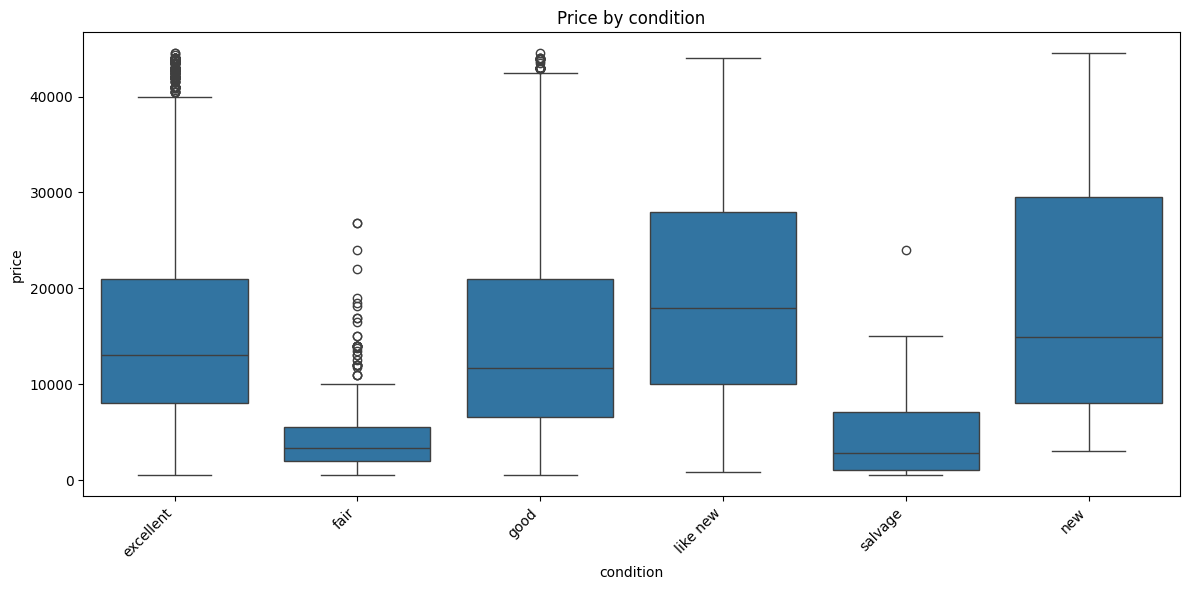

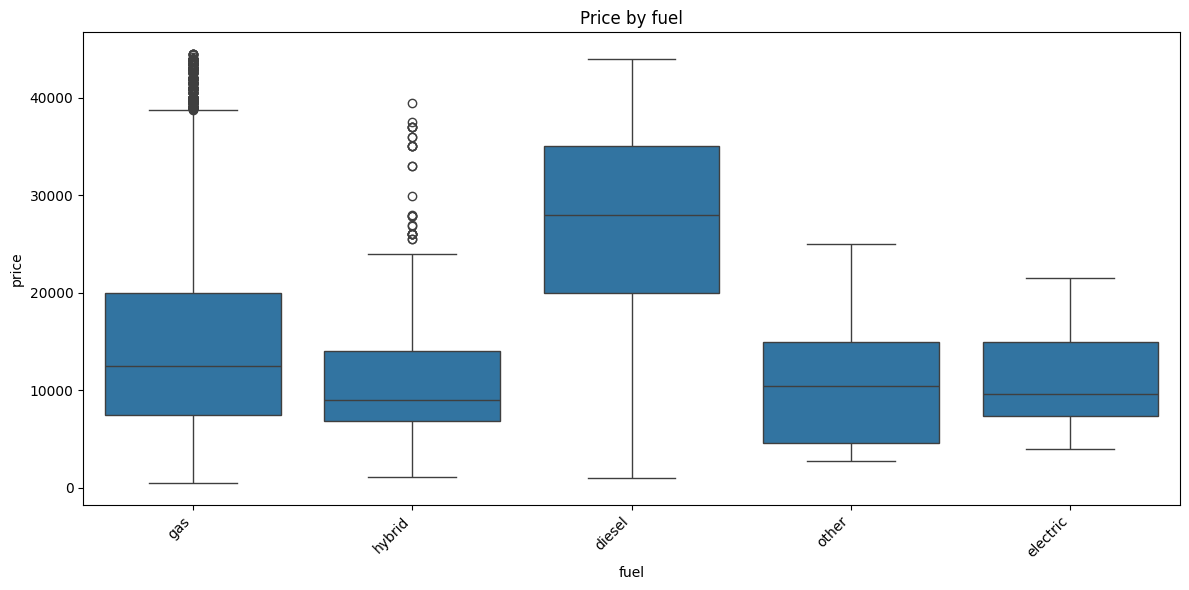

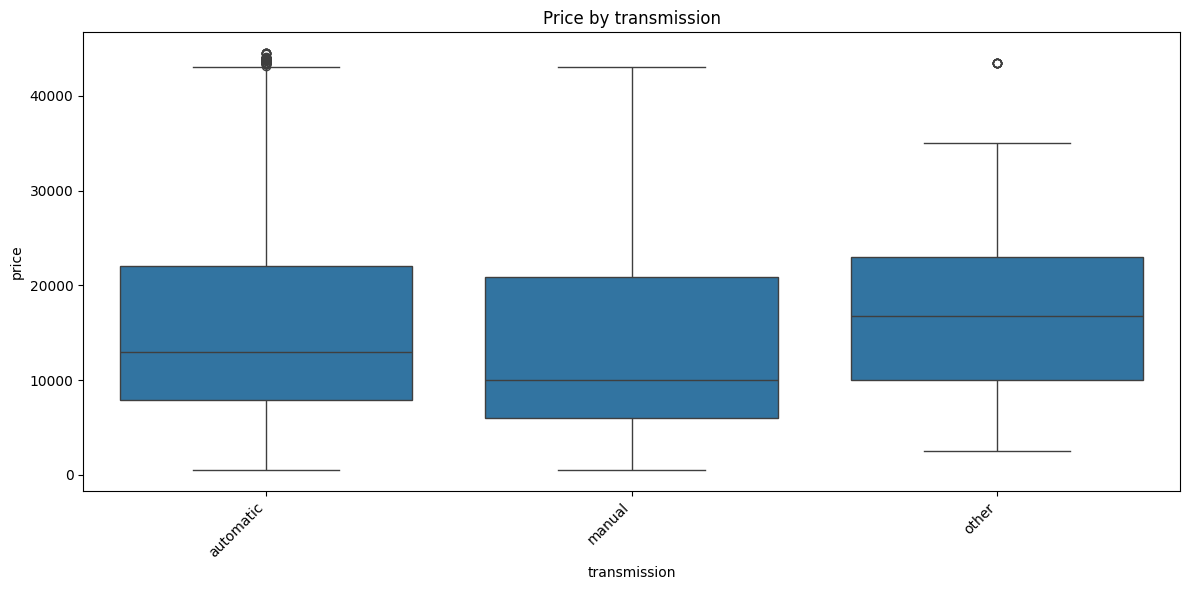

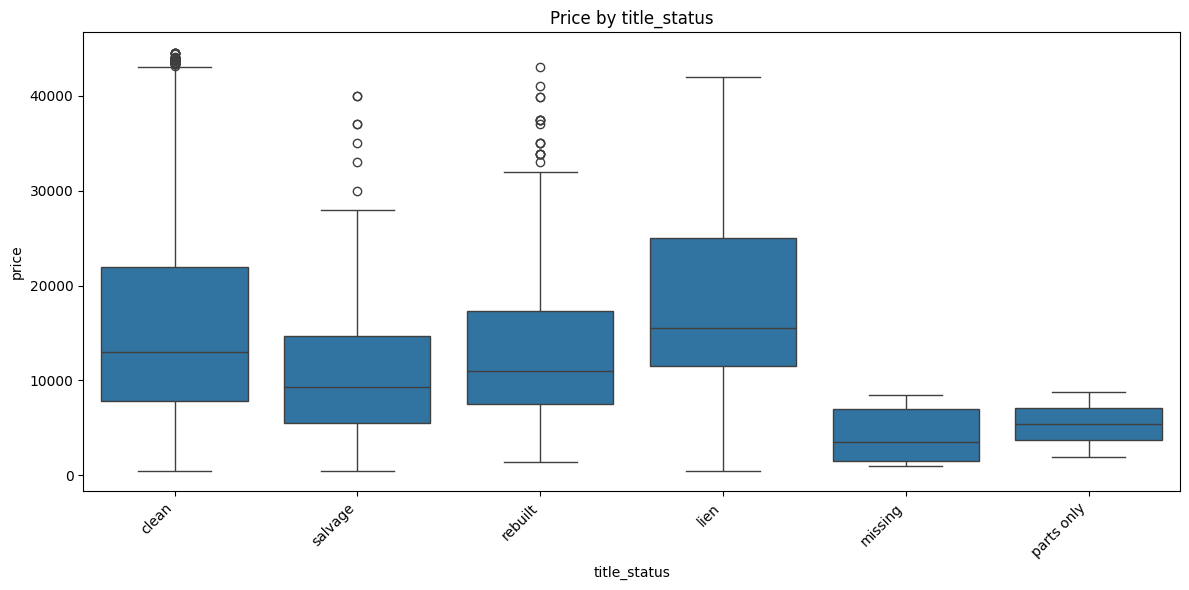

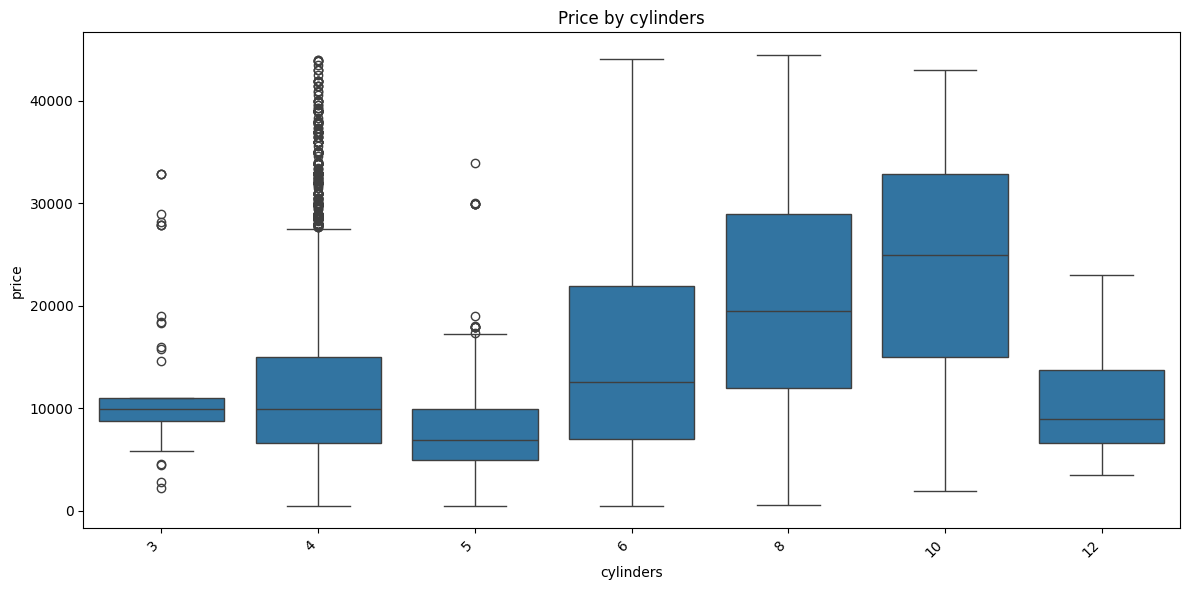

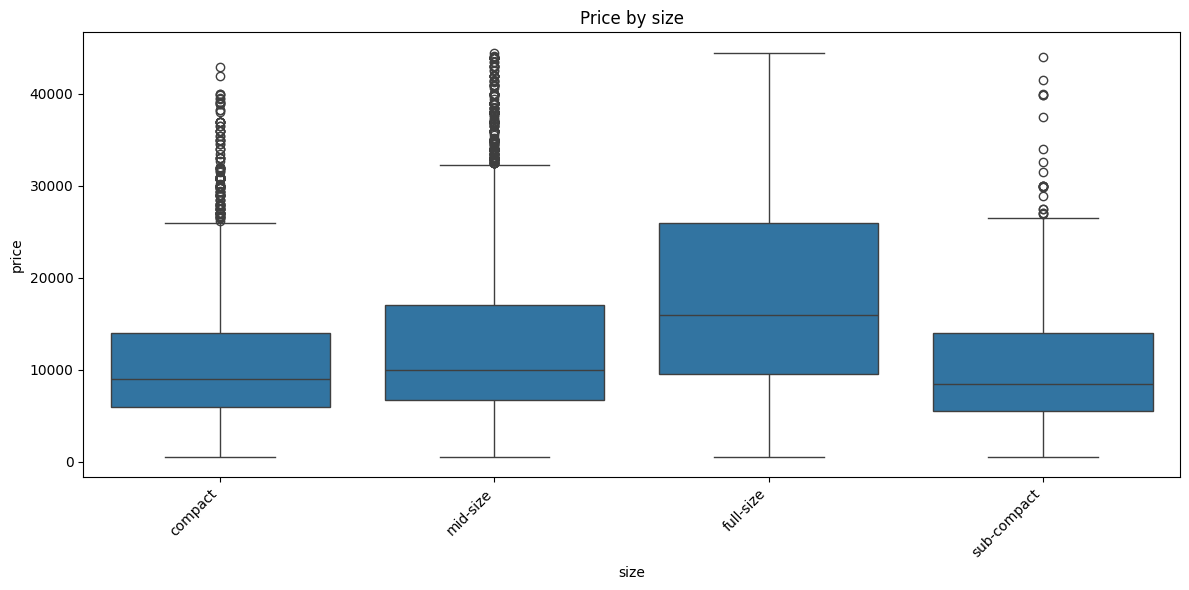

In [144]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_categorical_vs_price(df, cat_col, kind='box', figsize=(12, 6)):
    """Plot relationship between a categorical variable and price."""
    plt.figure(figsize=figsize)
    if kind == 'box':
        sns.boxplot(data=df, x=cat_col, y='price')
    else:
        sns.violinplot(data=df, x=cat_col, y='price')
    plt.xticks(rotation=45, ha='right')
    plt.title(f'Price by {cat_col}')
    plt.tight_layout()
    plt.show()

# Example usage for each variable
for col in ['condition', 'fuel', 'transmission', 'title_status', 'cylinders', 'size']:
    if col in df_prepared.columns:
        plot_categorical_vs_price(df_prepared, col)

Observations from Box Plots of various Categorical Values
- New and Like New Cars can be priced competitively as they seem to get more value 
- Electric and Diesel cars seems to get more price 
- Automatic Transmission seems to be more popular 
- Clean Title helps. 
- Most popular vehicle is the one with 8 cyclinders
- There are more full sized vehicles that are priced well. They seem to be more popular

Year vs price

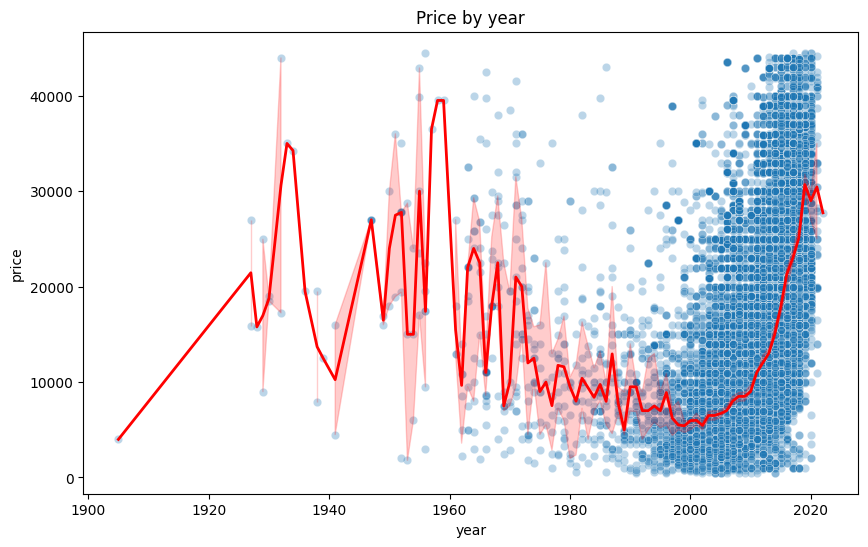

In [145]:
# Scatter: year vs price (optionally with trend)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_prepared, x='year', y='price', alpha=0.3)
sns.lineplot(data=df_prepared, x='year', y='price', estimator='median', color='red', linewidth=2)
plt.title('Price by year')
plt.show()

- Remove Outliers for Year Data based on the above picture. 

In [146]:
df_prepared['year'].describe()

count    30206.000000
mean      2010.627855
std          7.103328
min       1905.000000
25%       2008.000000
50%       2012.000000
75%       2015.000000
max       2022.000000
Name: year, dtype: float64

In [147]:
one_precentile_value = df_prepared['year'].quantile(0.01)

99% of the data lies in years above 1982. So, let's only consider the data for the years greater than 1982.

In [148]:
df_prepared = df_prepared[df_prepared['year'] >= one_precentile_value].reset_index(drop=True) # Drop rows with year less than one_precentile_value

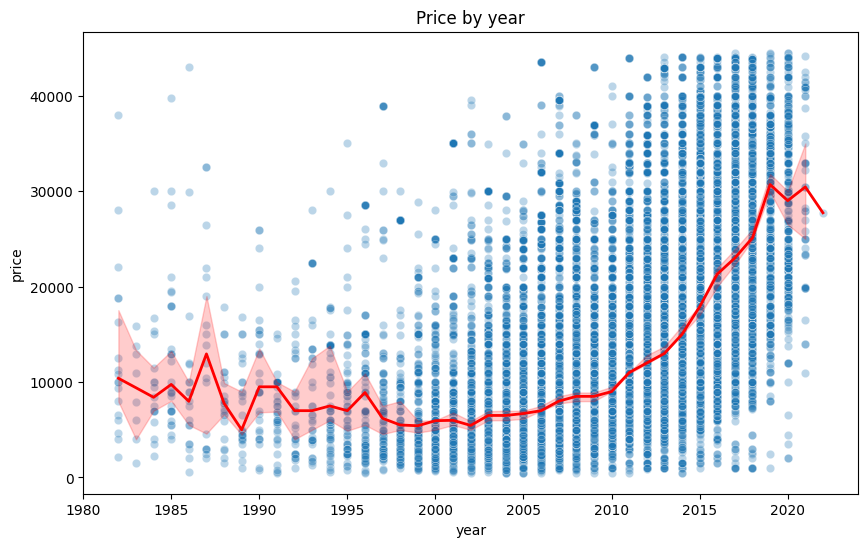

In [149]:
# Scatter: year vs price (optionally with trend)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_prepared, x='year', y='price', alpha=0.3)
sns.lineplot(data=df_prepared, x='year', y='price', estimator='median', color='red', linewidth=2)
plt.title('Price by year')
plt.show()

Model vs price

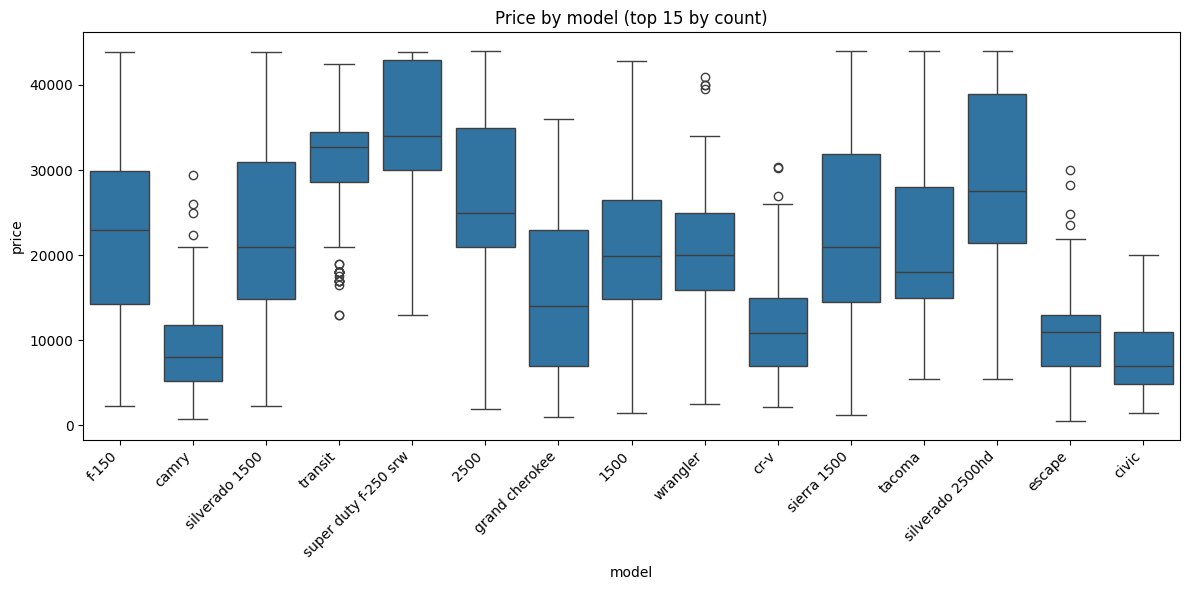

In [150]:
top_models = df_prepared['model'].value_counts().head(15).index
df_top = df_prepared[df_prepared['model'].isin(top_models)]
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_top, x='model', y='price')
plt.xticks(rotation=45, ha='right')
plt.title('Price by model (top 15 by count)')
plt.tight_layout()
plt.show()

Based on the data analysis I decided to only use  odometer and paint_color as independent variables and price as the target variables.  

In [151]:
# cols = ['price', 'odometer', 'paint_color']
cols = ['price', 'odometer']
cols = [c for c in cols if c in df_prepared.columns]
df_subset = df_prepared[cols]
df_subset.head()

,price,odometer
0,4000,155000.0
1,2500,110661.0
2,9000,56700.0
3,8950,164000.0
4,9400,129473.0


One Hot Encode Paint Color  

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

Modeling Steps 
- Split the data into Train and Test Data sets 
- Create Pipline models applying transformations to create polynomial regression models

In [153]:
from sklearn.model_selection import train_test_split  
df_subset_train, df_subset_test = train_test_split(df_subset, test_size=0.2, random_state=42)
df_subset_train.info()
df_subset_test.info()

X_train = df_subset_train.drop(columns=['price'])
y_train = df_subset_train['price']
X_test = df_subset_test.drop(columns=['price'])
y_test = df_subset_test['price']

<class 'pandas.core.frame.DataFrame'>
Index: 23935 entries, 8617 to 23654
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   price     23935 non-null  int64  
 1   odometer  23935 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 561.0 KB
<class 'pandas.core.frame.DataFrame'>
Index: 5984 entries, 10373 to 17817
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   price     5984 non-null   int64  
 1   odometer  5984 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 140.2 KB


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [155]:
train_mses = []
test_mses = []

for i in range(1, 11):
    pipe = Pipeline([('pfeat', PolynomialFeatures(degree=i, include_bias=False)), ('linreg', LinearRegression())])
    pipe.fit(X_train, y_train)
    train_preds = pipe.predict(X_train)
    test_preds = pipe.predict(X_test)
    train_mses.append(mean_squared_error(y_train, train_preds))
    test_mses.append(mean_squared_error(y_test, test_preds))

The Complexity that minimized Test Error was: 2


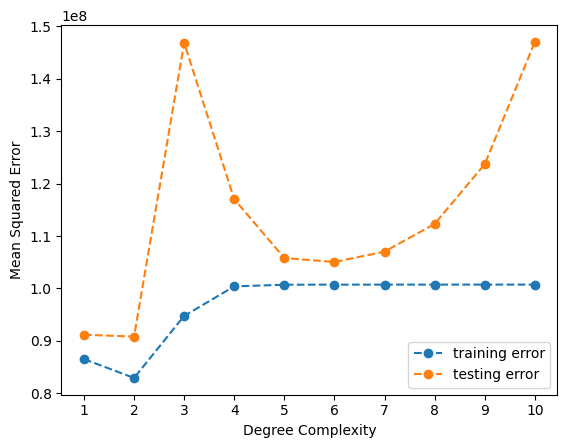

In [156]:
print(f'The Complexity that minimized Test Error was: {test_mses.index(min(test_mses)) + 1}')
plt.plot(range(1, 11), train_mses, '--o', label = 'training error')
plt.plot(range(1, 11), test_mses, '--o', label = 'testing error')
plt.xticks(range(1, 11), range(1, 11))
plt.xlabel('Degree Complexity')
plt.ylabel('Mean Squared Error')
plt.legend();

In [157]:
def simple_cross_validation(X_train, y_train, X_test, y_test):
    best_pipe = None #placeholder for best model
    best_mse = np.inf #set best mse to infinity to begin

    for i in range(1, 11):
        pipe = Pipeline([('pfeat', PolynomialFeatures(degree=i, include_bias=False)), ('linreg', LinearRegression())])
        pipe.fit(X_train, y_train)
        train_preds = pipe.predict(X_train)
        test_preds = pipe.predict(X_test)
        test_mse = mean_squared_error(y_test, test_preds)
        if test_mse < best_mse:
            best_mse = test_mse
            best_pipe = pipe

    return best_pipe

best_model = simple_cross_validation(X_train, y_train, X_test, y_test)
best_model.get_params() #should be degree = 2

{'memory': None,
 'steps': [('pfeat', PolynomialFeatures(include_bias=False)),
  ('linreg', LinearRegression())],
 'transform_input': None,
 'verbose': False,
 'pfeat': PolynomialFeatures(include_bias=False),
 'linreg': LinearRegression(),
 'pfeat__degree': 2,
 'pfeat__include_bias': False,
 'pfeat__interaction_only': False,
 'pfeat__order': 'C',
 'linreg__copy_X': True,
 'linreg__fit_intercept': True,
 'linreg__n_jobs': None,
 'linreg__positive': False,
 'linreg__tol': 1e-06}

In [165]:
df_sample = df_subset.sample(n=5000, random_state=42)

df_sample_train, df_sample_test = train_test_split(df_sample, test_size=0.2, random_state=42)
df_sample_train.info()
df_sample_test.info()

X_train = df_sample_train.drop(columns=['price'])
y_train = df_sample_train['price']
X_test = df_sample_test.drop(columns=['price'])
y_test = df_sample_test['price']

<class 'pandas.core.frame.DataFrame'>
Index: 4000 entries, 14428 to 25132
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   price     4000 non-null   int64  
 1   odometer  4000 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 93.8 KB
<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 12865 to 25988
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   price     1000 non-null   int64  
 1   odometer  1000 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 23.4 KB


In [ ]:
ols_pipe = Pipeline([
    ('poly_features', PolynomialFeatures(degree=2, include_bias=False)),
    ('linreg', LinearRegression())
])
ols_pipe.fit(X_train, y_train)
ols_preds = ols_pipe.predict(X_test)
ols_mse = mean_squared_error(y_test, ols_preds)
print(f'MSE of OLS model: {ols_mse}')

MSE of OLS model: 82222710.56390736


In [ ]:
# Predicted vs actual price (line plot, first 300)
y_actual = np.ravel(y_test_4)[:300]
n = 300
plt.figure(figsize=(10, 5))
plt.plot(range(n), y_actual, label='Actual price', alpha=0.8)
plt.plot(range(n), ols_preds[:300], label='Predicted price', alpha=0.8)
plt.xlabel('Sample index')
plt.ylabel('Price')
plt.title('OLS model: Predicted vs actual price')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

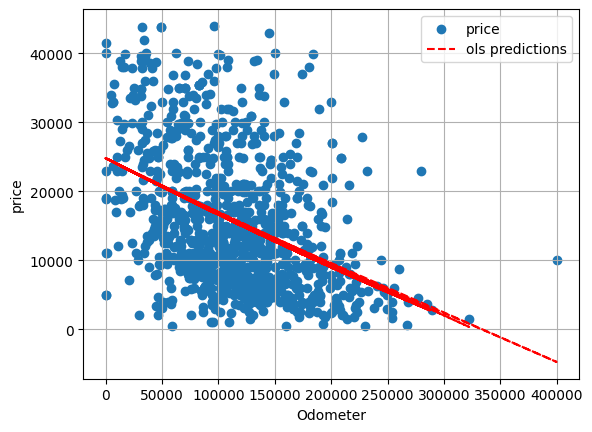

In [170]:
##  Visualize solutions
Xnp = X_test.to_numpy()
plt.scatter(Xnp, y_test, label = 'price')
plt.xlabel('Odometer')
plt.ylabel('price')
plt.plot(Xnp, ols_preds, 'r--', label = 'ols predictions')
plt.legend()
plt.grid()

From the OLS Predictions it is seen that there is a lot of data that's concentrated. 
Now we will do 2 things. Let's add paint color in hot encoded form and also fix the degree of polynomial to 2 and see how it goes. 

Let's use a Sequential Feature Selector on the whole data set to figure out what features would help us. 

In [184]:
df_sample_2 = df_prepared.sample(n=5000, random_state=42)

df_sample_2 = df_sample_2.drop(columns=['manufacturer', 'model', 'condition', 'fuel', 'title_status', 'transmission', 'drive', 'size', 'type', 'paint_color']).reset_index()

df_sample_2_train, df_sample_2_test = train_test_split(df_sample_2, test_size=0.2, random_state=42)
df_sample_2_train.info()
df_sample_2_test.info()

X_train_2 = df_sample_2_train.drop(columns=['price'])
y_train_2 = df_sample_2_train['price']
X_test_2 = df_sample_2_test.drop(columns=['price'])
y_test_2 = df_sample_2_test['price']

<class 'pandas.core.frame.DataFrame'>
Index: 4000 entries, 4227 to 860
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   index      4000 non-null   int64  
 1   price      4000 non-null   int64  
 2   year       4000 non-null   float64
 3   cylinders  4000 non-null   int64  
 4   odometer   4000 non-null   float64
dtypes: float64(2), int64(3)
memory usage: 187.5 KB
<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 1501 to 1926
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   index      1000 non-null   int64  
 1   price      1000 non-null   int64  
 2   year       1000 non-null   float64
 3   cylinders  1000 non-null   int64  
 4   odometer   1000 non-null   float64
dtypes: float64(2), int64(3)
memory usage: 46.9 KB


In [187]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.metrics import mean_squared_error


selector = SequentialFeatureSelector(
    LinearRegression(),
    n_features_to_select=2,
    cv=10,  # 5-fold cross-validation (use 3 or 10 if you prefer)
    scoring='neg_mean_squared_error'
)
Xt = selector.fit_transform(X_train_2, np.ravel(y_train_2))
selected_features = selector.get_feature_names_out()
print(selected_features)

['year' 'cylinders']


Let's add One Hot Encoding of Paint Color as well and run through the SequentialFeatureSelector

In [ ]:
df_sample_3 = df_prepared.sample(n=5000, random_state=42)
df_sample_3 = df_sample_3.drop(columns=['manufacturer', 'model', 'condition', 'fuel', 'title_status', 'transmission', 'drive', 'size', 'type']).reset_index()
df_sample_3

,index,price,year,cylinders,odometer,paint_color
0,10373,3000,1994.0,8,239000.0,blue
1,15978,10990,2005.0,4,99000.0,silver
2,22629,1000,2012.0,4,162017.0,black
3,3246,8500,2007.0,6,179000.0,white
4,18418,19890,2018.0,4,12366.0,silver
...,...,...,...,...,...,...
4995,15606,19995,2018.0,6,73543.0,silver
4996,18338,6400,2010.0,4,144234.0,red
4997,19820,24660,2012.0,8,82000.0,silver
4998,24782,24500,2006.0,8,147000.0,white


One Hot Encoding

<!-- One Hot Encoding -->

In [193]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
paint_encoded = encoder.fit_transform(df_sample_3[['paint_color']])

# Get feature names and build a DataFrame
feature_names = encoder.get_feature_names_out(['paint_color'])
df_paint = pd.DataFrame(paint_encoded, columns=feature_names, index=df_sample_3.index)
df_sample_4 = pd.concat([df_sample_3.drop(columns=['paint_color']), df_paint], axis=1)
df_sample_4.head()

,index,price,year,cylinders,odometer,paint_color_black,paint_color_blue,paint_color_brown,paint_color_custom,paint_color_green,paint_color_grey,paint_color_orange,paint_color_purple,paint_color_red,paint_color_silver,paint_color_white,paint_color_yellow
0,10373,3000,1994.0,8,239000.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,15978,10990,2005.0,4,99000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,22629,1000,2012.0,4,162017.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3246,8500,2007.0,6,179000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,18418,19890,2018.0,4,12366.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [195]:
df_sample_4_train, df_sample_4_test = train_test_split(df_sample_4, test_size=0.2, random_state=42)
df_sample_4_train.info()
df_sample_4_test.info()

X_train_4 = df_sample_4_train.drop(columns=['price'])
y_train_4 = df_sample_4_train['price']
X_test_4 = df_sample_4_test.drop(columns=['price'])
y_test_4 = df_sample_4_test['price']

<class 'pandas.core.frame.DataFrame'>
Index: 4000 entries, 4227 to 860
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   index               4000 non-null   int64  
 1   price               4000 non-null   int64  
 2   year                4000 non-null   float64
 3   cylinders           4000 non-null   int64  
 4   odometer            4000 non-null   float64
 5   paint_color_black   4000 non-null   float64
 6   paint_color_blue    4000 non-null   float64
 7   paint_color_brown   4000 non-null   float64
 8   paint_color_custom  4000 non-null   float64
 9   paint_color_green   4000 non-null   float64
 10  paint_color_grey    4000 non-null   float64
 11  paint_color_orange  4000 non-null   float64
 12  paint_color_purple  4000 non-null   float64
 13  paint_color_red     4000 non-null   float64
 14  paint_color_silver  4000 non-null   float64
 15  paint_color_white   4000 non-null   float64
 16  paint_col

In [197]:
selector2 = SequentialFeatureSelector(
    LinearRegression(),
    n_features_to_select=4,
    cv=10,  # 5-fold cross-validation (use 3 or 10 if you prefer)
    scoring='neg_mean_squared_error'
)
Xt = selector2.fit_transform(X_train_4, np.ravel(y_train_4))
selected_features = selector2.get_feature_names_out()
print(selected_features)

['year' 'cylinders' 'odometer' 'paint_color_white']


### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high-quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight into drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

- Calculate the minimum MSE of the models created in modeling phase. 
- For the model with least MSE predict values on the test data and observe. 

In [199]:
X_reduced = X_train_4[selected_features]
X_test_4_reduced = X_test_4[selected_features]
lr = LinearRegression().fit(X_reduced, y_train_4)
model_preds = lr.predict(X_test_4_reduced)
mse = mean_squared_error(model_preds, y_test_4)

# Answer check
print(mse)

44065788.87870009


In [205]:
ols_pipe = Pipeline([
    ('poly_features', PolynomialFeatures(degree=2, include_bias=False)),
    ('linreg', LinearRegression())
])
ols_pipe.fit(X_reduced, y_train_4)
ols_preds = ols_pipe.predict(X_test_4_reduced)
ols_mse = mean_squared_error(y_test_4, ols_preds)
print(f'MSE of OLS model: {ols_mse}')

MSE of OLS model: 41752928.82037474


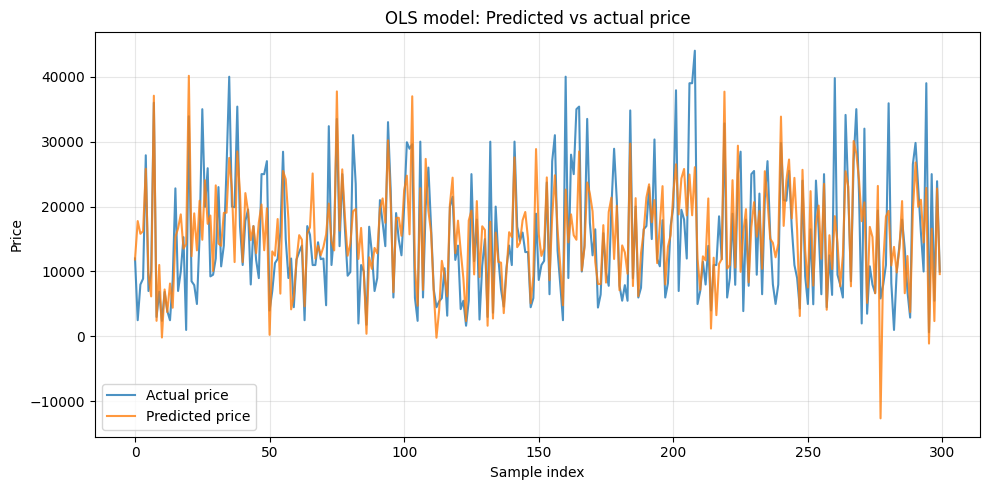

In [ ]:
# Predicted vs actual price (line plot, first 300)
y_actual = np.ravel(y_test_4)[:300]
n = 300
plt.figure(figsize=(10, 5))
plt.plot(range(n), y_actual, label='Actual price', alpha=0.8)
plt.plot(range(n), ols_preds[:300], label='Predicted price', alpha=0.8)
plt.xlabel('Sample index')
plt.ylabel('Price')
plt.title('OLS model: Predicted vs actual price for 300 samples of the data')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine-tuning their inventory.

- Create a report based on the data from the previous step. 